In [1]:
import numpy as np
import scipy.stats as sps
from scipy import optimize
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Задание 3
## Метрики в задачах регрессии
### Генерация первичных данных
500 точек с абсциссой от 0 до 50, ордината подчиняется закону $y=0.5x + 1 + \varepsilon$

In [2]:
x = np.linspace(0, 50, 500)
y = 0.5 * x + 1 + sps.norm.rvs(size=500, scale=sqrt(0.2))

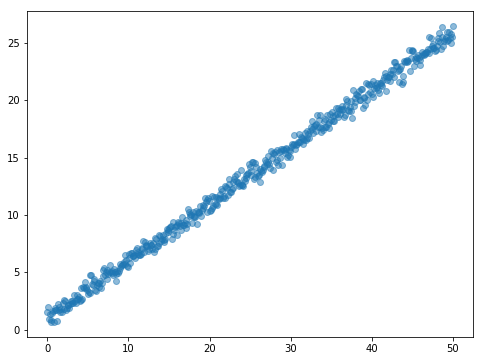

In [3]:
pyplot.figure(figsize=(8,6))
pyplot.scatter(x, y, alpha=0.5)
pyplot.show()

###  Восстановление зависимости
Решаем оптимизационную задачу, минимизируя MSE

In [4]:
MSE = lambda a: np.sum(((a[0] * x + a[1]) - y) ** 2)
MAE = lambda a: np.sum(np.abs((a[0] * x + a[1]) - y))

answer_MSE = optimize.minimize(MSE, [0, 0]).x
answer_MAE = optimize.minimize(MAE, [0, 0]).x
print "MSE: ", answer_MSE[0], "x + ", answer_MSE[1], ", ошибка: ", answer_MSE - [0.5, 1]
print "MAE: ", answer_MAE[0], "x + ", answer_MAE[1], ", ошибка: ", answer_MAE - [0.5, 1]

MSE:  0.498297078458 x +  1.0296732711 , ошибка:  [-0.00170292  0.02967327]
MAE:  0.497603143308 x +  1.03589507268 , ошибка:  [-0.00239686  0.03589507]


Действительно, получилось неплохо:

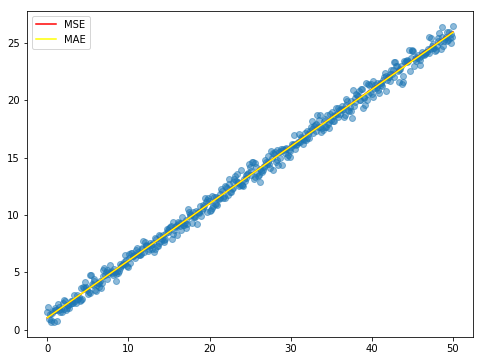

In [5]:
def graph(answer_MSE, answer_MAE):
    pyplot.figure(figsize=(8,6))
    pyplot.scatter(x, y, alpha=0.5)
    pyplot.plot([0, 50], [answer_MSE[1], 50 * answer_MSE[0] + answer_MSE[1]], color='red', label='MSE')
    pyplot.plot([0, 50], [answer_MAE[1], 50 * answer_MAE[0] + answer_MAE[1]], color='yellow', label='MAE')
    pyplot.legend()
    pyplot.show()
    
graph(answer_MSE, answer_MAE)

### Добавление выбросов
75 точек со случайными (равномерно) координатами в пределах рассматриваемой области от 0 до 10. $y=-1+\varepsilon$

In [6]:
x_add = np.concatenate((x, sps.uniform.rvs(size=75, loc=0, scale=50)))
y_add = np.concatenate((y, -1 + sps.norm.rvs(size=75, scale=np.sqrt(0.2))))

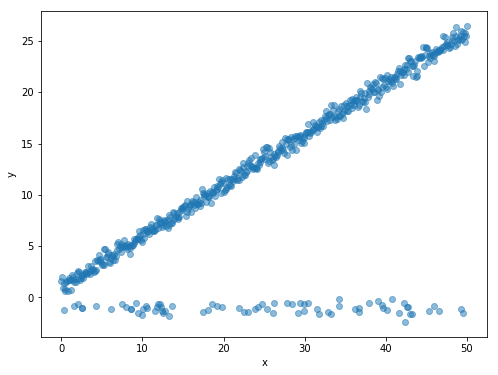

In [7]:
pyplot.figure(figsize=(8,6))
pyplot.scatter(x_add, y_add, alpha=0.5)
pyplot.xlabel('x')
pyplot.ylabel('y') 

In [8]:
MSE_add = lambda a: np.sum(((a[0] * x_add + a[1]) - y_add) ** 2)
MAE_add = lambda a: np.sum(np.abs((a[0] * x_add + a[1]) - y_add))

answer_MSE = optimize.minimize(MSE_add, [0, 0]).x
answer_MAE = optimize.minimize(MAE_add, [0, 0]).x
print "MSE: ", answer_MSE[0], "x + ", answer_MSE[1], ", ошибка: ", answer_MSE - [0.5, 1]
print "MAE: ", answer_MAE[0], "x + ", answer_MAE[1], ", ошибка: ", answer_MAE - [0.5, 1]

MSE:  0.441496269995 x +  0.587049732636 , ошибка:  [-0.05850373 -0.41295027]
MAE:  0.499578133341 x +  0.869557993785 , ошибка:  [-0.00042187 -0.13044201]


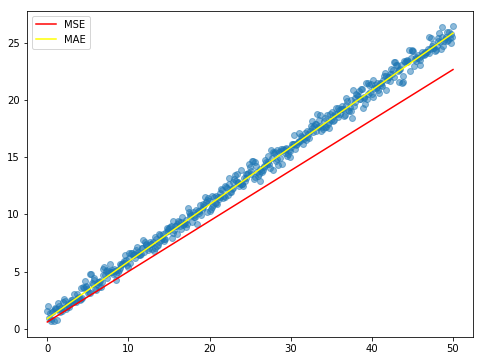

In [9]:
graph(answer_MSE, answer_MAE)

MAE оказался устойчивее к выбросам